In [15]:
import pandas as pd
import os
#import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
model = "XVAE_scGAN_multiclass"
PATH = f"/trinity/home/skatz/PROJECTS/Multi-view-Deconfounding-VAE/lightning_logs/confounded_linear/stability/{model}"

In [18]:
df = pd.DataFrame()
for folder in os.listdir(PATH):
    try:
        tmp = pd.read_csv(f"{PATH}/{folder}/XVAE_adversarialTrg/epoch150/results_performance.csv")
        tmp["run"] = folder
        df = pd.concat([df, tmp], axis=0)
    except FileNotFoundError:
        print("Something went wrong")
        continue

Something went wrong


In [19]:
df.shape

(50, 12)

In [20]:
df.to_csv("tmp.csv", index=False)

Text(0.5, 1.0, 'ARI - true')

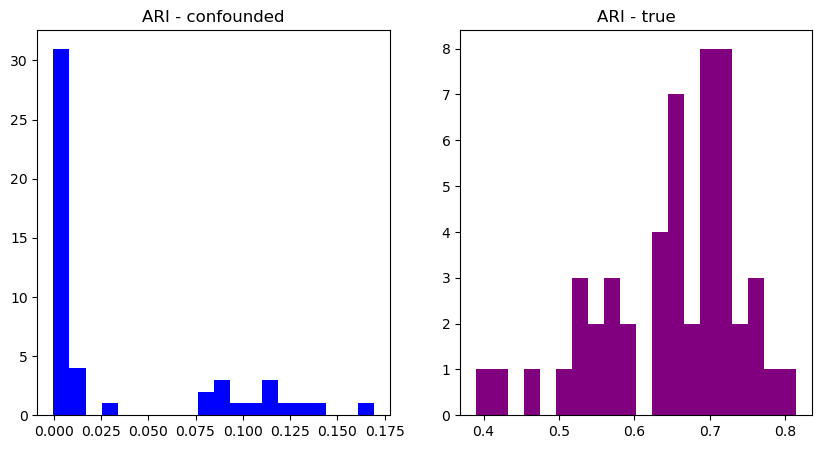

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(df["ari_confoundedCluster"], bins=20, color="blue")
ax2.hist(df["ari_trueCluster"], bins=20, color="purple")
#ax1.violin(df["ari_confoundedCluster"])
ax1.set_title("ARI - confounded")
ax2.set_title("ARI - true")